In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tech_data = pd.read_csv('tech_data_update.csv').drop(columns={'Unnamed: 0'})
finance_data = pd.read_csv('../ExtractFinances/Financial_stock_data.csv')
auto_data = pd.read_csv('../Automotive/final_auto_stock_data.csv')
healthcare_data = pd.read_csv('../Extracted Data/Healthcare_Stock_Data4.csv')

In [3]:
data = pd.concat([tech_data, finance_data, auto_data, healthcare_data])
print (f'there are {len(data["Ticker"].unique())} unique stocks')
data

there are 80 unique stocks


,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,QCOM,Technology,Semiconductors,64.38,65.3300,64.17,65.20,6299841.0
1,2018-01-03,QCOM,Technology,Semiconductors,65.22,66.0600,64.69,65.94,6721391.0
2,2018-01-04,QCOM,Technology,Semiconductors,66.18,66.5300,65.91,66.03,5035323.0
3,2018-01-05,QCOM,Technology,Semiconductors,66.04,66.6000,65.50,66.47,5345423.0
4,2018-01-08,QCOM,Technology,Semiconductors,66.25,66.5300,65.94,66.27,4253127.0
...,...,...,...,...,...,...,...,...,...
29202,2023-11-22,MRK,Healthcare,Drug Manufacturers,102.20,102.6800,101.11,101.68,5724130.0
29203,2023-11-24,MRK,Healthcare,Drug Manufacturers,102.26,102.5136,101.44,101.87,3167952.0
29204,2023-11-27,MRK,Healthcare,Drug Manufacturers,101.91,102.1500,100.70,101.43,7356536.0
29205,2023-11-28,MRK,Healthcare,Drug Manufacturers,101.31,101.3500,100.01,100.18,8738483.0


In [4]:
# unique stocks
print(tech_data['Ticker'].unique())
print(finance_data['Ticker'].unique())
print(auto_data['Ticker'].unique())
array = np.append((np.append(tech_data['Ticker'].unique(), finance_data['Ticker'].unique())),auto_data['Ticker'].unique())
print((array))

def find_duplicates(lst):
    seen = set()
    duplicates = set()

    for item in lst:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)

    return list(duplicates)

# Example usage with strings:
print("Duplicates in the list:", find_duplicates(array))


['QCOM' 'TXN' 'ADI' 'MU' 'ARM' 'CRM' 'SAP' 'INTU' 'NOW' 'ZI' 'AAPL' 'MSFT'
 'SONY' 'LPL' 'SONO' 'ACN' 'IBM' 'FI' 'INFY' 'CTSH']
['WD' 'PFSI' 'LDI' 'GHI' 'COOP' 'AFL' 'HIG' 'PRU' 'ALL' 'PGR' 'MS' 'BLK'
 'GS' 'TROW' 'BEN' 'V' 'MA' 'AXP' 'DFS' 'COF']
['CPRT' 'KMX' 'PAG' 'LAD' 'AN' 'MBLY' 'APTV' 'MGA' 'LKQ' 'ALV' 'TSLA' 'TM'
 'HMC' 'GM' 'F' 'NVDA' 'TSM' 'AVGO' 'AMD' 'INTC']
['QCOM' 'TXN' 'ADI' 'MU' 'ARM' 'CRM' 'SAP' 'INTU' 'NOW' 'ZI' 'AAPL' 'MSFT'
 'SONY' 'LPL' 'SONO' 'ACN' 'IBM' 'FI' 'INFY' 'CTSH' 'WD' 'PFSI' 'LDI'
 'GHI' 'COOP' 'AFL' 'HIG' 'PRU' 'ALL' 'PGR' 'MS' 'BLK' 'GS' 'TROW' 'BEN'
 'V' 'MA' 'AXP' 'DFS' 'COF' 'CPRT' 'KMX' 'PAG' 'LAD' 'AN' 'MBLY' 'APTV'
 'MGA' 'LKQ' 'ALV' 'TSLA' 'TM' 'HMC' 'GM' 'F' 'NVDA' 'TSM' 'AVGO' 'AMD'
 'INTC']
Duplicates in the list: []


#### All companies

In [5]:
print(f'There are {len(data["Ticker"].unique())} stocks')

There are 80 stocks


In [6]:
data['Sector'].unique()

array(['Technology', 'Finance', 'Automobiles', 'Healthcare'], dtype=object)

In [7]:
data_sectors = data['Sector'].unique()
close_prices = []
for sector in data_sectors:
    close_prices.append(data[data['Sector']==sector].groupby('Date')['Close'].sum().rename(sector))

close_prices_sector = pd.concat(close_prices, axis = 1)
# close_prices_sector.dropna(how='any', axis=0)
close_prices_sector

,Technology,Finance,Automobiles,Healthcare
Date,,,,
2018-01-02,1655.76,1975.795009,1739.23,2750.75
2018-01-03,1672.93,1983.375045,1762.93,2784.00
2018-01-04,1691.84,2002.769992,1772.72,2780.68
2018-01-05,1707.14,2019.825018,1794.66,2814.56
2018-01-08,1709.45,2019.839986,1827.63,2799.51
...,...,...,...,...
2023-11-28,3611.02,3090.400008,3182.35,5490.08
2023-11-29,3643.20,3116.129998,3186.16,5434.82
2023-11-30,3670.31,3144.529962,3150.65,NaN


#### Moving Average
4. Which sector has the best moving average in there respective industry? (Alison)
    - Grouped bargraph: price values per sector (xlabel: sectors) --> moving average (1 graph)

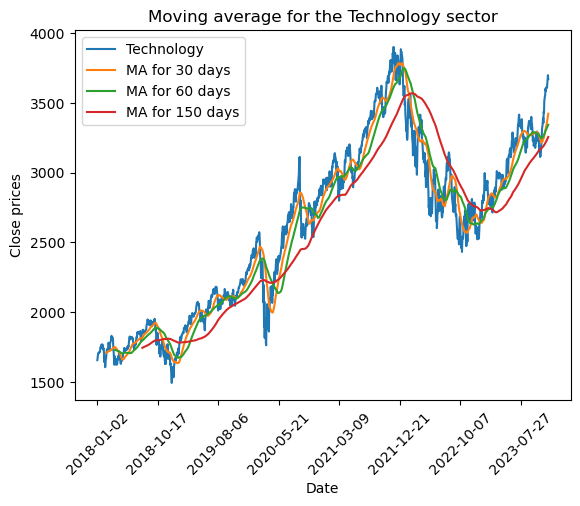

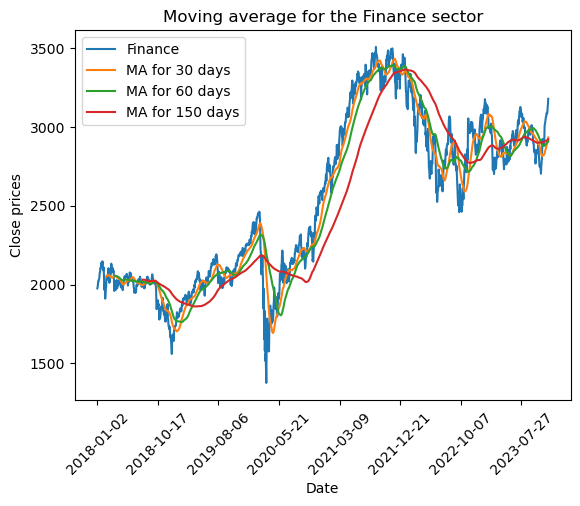

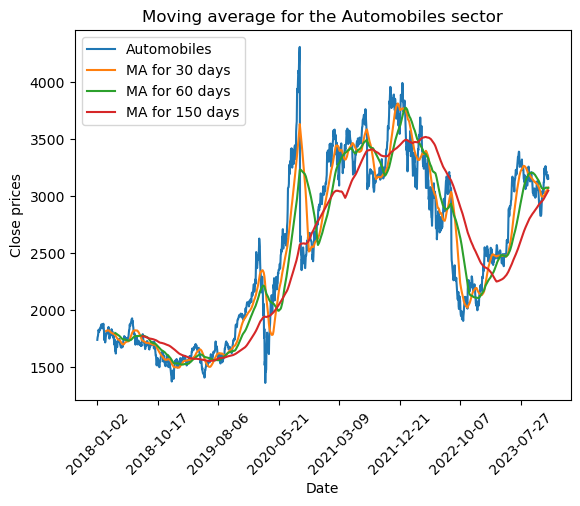

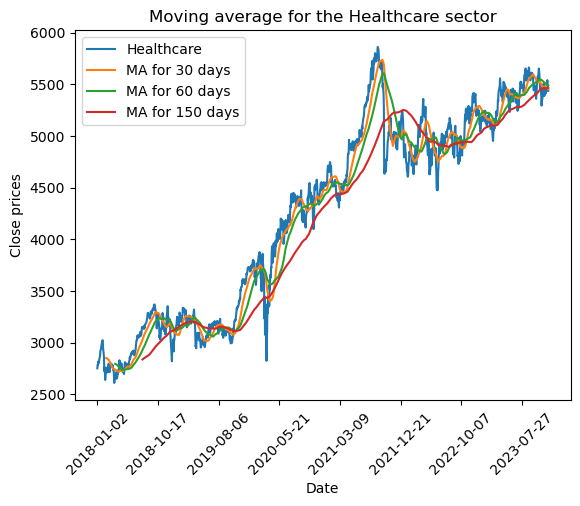

In [8]:
mov_avg_dict = {}
ma_days = [30, 60, 150]
for sector in data_sectors:
    mov_avg = {}
    mov_avg[sector] = close_prices_sector[sector]
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        mov_avg[column_name] = close_prices_sector[sector].rolling(ma).mean()
    mov_avg_df = pd.DataFrame(mov_avg)
    mov_avg_dict[sector] = mov_avg_df
    mov_avg_dict[sector].plot(rot = 45, 
                              ylabel = 'Close prices',
                              title = f'Moving average for the {sector} sector')


# mov_avg_dict['Technology']

Text(0.5, 1.0, 'Healthcare')

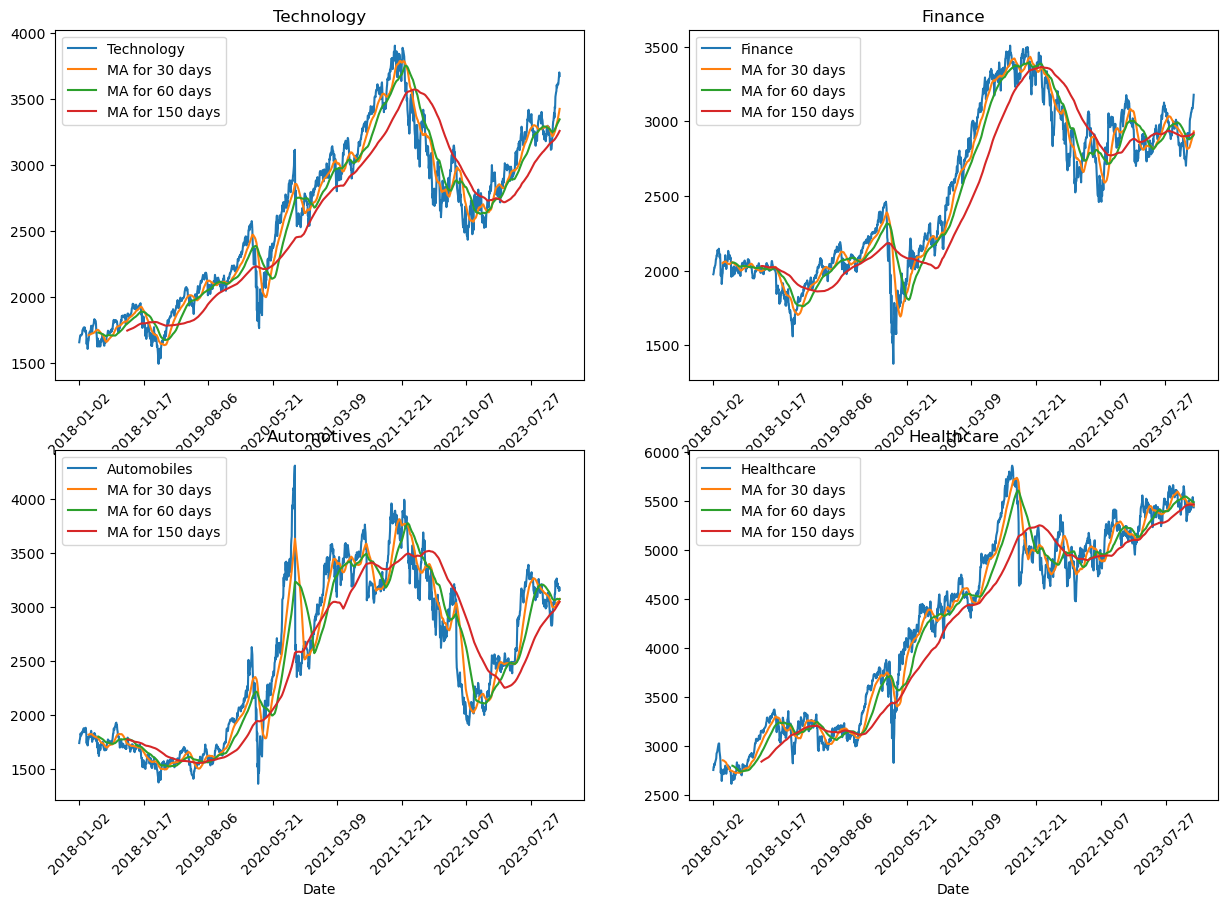

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

mov_avg_dict['Technology'].plot(ax=axes[0,0], rot = 45)
axes[0,0].set_title('Technology')

mov_avg_dict['Finance'].plot(ax=axes[0,1], rot = 45)
axes[0, 1].set_title('Finance')

mov_avg_dict['Automobiles'].plot(ax=axes[1, 0], rot = 45)
axes[1, 0].set_title('Automotives')

mov_avg_dict['Healthcare'].plot(ax=axes[1, 1], rot = 45)
axes[1, 1].set_title('Healthcare')

#### Highest volume traded ticker (By stock  in sector)
5. Which ticker was most traded in each year? (Alison)
    - Answered by bar graph(name of stocks in each sector as xticks and height of the bar will be the average of volume)

##### Tech Volumes by year

In [10]:
years = [2018, 2019, 2020, 2021, 2022, 2023]

,2018,2019,2020,2021,2022,2023
QCOM,3.223307e+09,3.395688e+09,2.478365e+09,2.307926e+09,2.374247e+09,1.885303e+09
TXN,1.489689e+09,1.244333e+09,1.303744e+09,1.069035e+09,1.477339e+09,1.188436e+09
ADI,7.203665e+08,6.294586e+08,7.418284e+08,8.845393e+08,9.081106e+08,7.829945e+08
MU,1.085445e+10,6.686586e+09,5.740642e+09,4.946457e+09,4.846323e+09,3.516508e+09
ARM,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.829105e+08


In 2018, 'MU' has the maximum value: 10854447338.0
In 2019, 'AAPL' has the maximum value: 7086568153.0
In 2020, 'AAPL' has the maximum value: 18552582945.0
In 2021, 'AAPL' has the maximum value: 22798348120.0
In 2022, 'AAPL' has the maximum value: 22050192133.0
In 2023, 'AAPL' has the maximum value: 13831665750.0


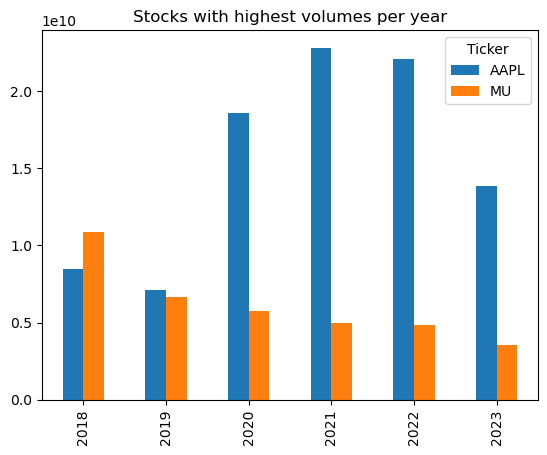

In [29]:
# calculating tech volumes per year
tech_data['Date'] = pd.to_datetime(tech_data['Date'])
tech_stocks = tech_data['Ticker'].unique()
volumes_tech = pd.DataFrame(index = tech_stocks)

for stock in tech_stocks:
    for year in years:
        # print(stock, year)
        temp_df = tech_data[tech_data['Ticker'] == stock]
        volumes_tech.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
display(volumes_tech.head())

volumes_tech.index.name = 'Ticker'
volumes_tech.loc[['AAPL', 'MU']].transpose().plot(kind = 'bar')
plt.title('Stocks with highest volumes per year')
max_idx = volumes_tech.idxmax()
max_values = volumes_tech.max()

# Display the result
for year, (index, value) in zip(volumes_tech.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

finance volumes:


,2018,2019,2020,2021,2022,2023
WD,54260700.0,37565800.0,62259200.0,36759200.0,39475400.0,44939100.0
PFSI,50420600.0,77963000.0,208978900.0,181616400.0,136023100.0,74756900.0
LDI,0.0,0.0,0.0,145805300.0,198008700.0,83746900.0
GHI,8055403.0,11297492.0,19453061.0,15183008.0,10558602.0,8426300.0
COOP,93931032.0,190457000.0,257945600.0,199618500.0,190745900.0,138925700.0


In 2018, 'MS' has the maximum value: 2615913900.0
In 2019, 'MS' has the maximum value: 2610298700.0
In 2020, 'MS' has the maximum value: 3442832100.0
In 2021, 'MS' has the maximum value: 2455031800.0
In 2022, 'MS' has the maximum value: 2212605900.0
In 2023, 'MS' has the maximum value: 1770795400.0


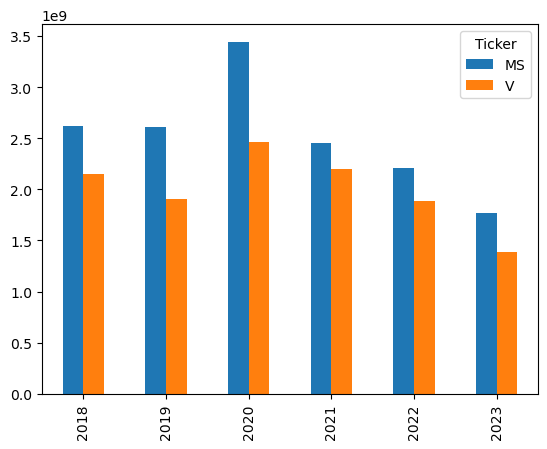

In [12]:
# calculating finance volumes per year
finance_data['Date'] = pd.to_datetime(finance_data['Date'])
finance_stocks = finance_data['Ticker'].unique()
volumes_finance = pd.DataFrame(index = finance_stocks)

for stock in finance_stocks:
    for year in years:
        # print(stock, year)
        temp_df = finance_data[finance_data['Ticker'] == stock]
        volumes_finance.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'finance volumes:')

display(volumes_finance.head())

volumes_finance.index.name = 'Ticker'
volumes_finance.loc[['MS', 'V']].transpose().plot(kind = 'bar')
max_idx = volumes_finance.idxmax()
max_values = volumes_finance.max()

# Display the result
for year, (index, value) in zip(volumes_finance.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

auto volumes:


,2018,2019,2020,2021,2022,2023
CPRT,511053510.0,361230870.0,432237914.0,248615282.0,334368470.0,619347614.0
KMX,463116782.0,399348221.0,418327154.0,288149404.0,497642399.0,470726931.0
PAG,106815905.0,94667891.0,94524261.0,79177681.0,100993602.0,77298944.0
LAD,81365326.0,60115127.0,85478498.0,92532328.0,94869262.0,64051926.0
AN,216788320.0,182633796.0,221615313.0,237972327.0,219366452.0,149428514.0


In 2018, 'AMD' has the maximum value: 21154399914.0
In 2019, 'AMD' has the maximum value: 16736086831.0
In 2020, 'F' has the maximum value: 19386854291.0
In 2021, 'F' has the maximum value: 19834224649.0
In 2022, 'AMD' has the maximum value: 22939283690.0
In 2023, 'TSLA' has the maximum value: 32270767332.0


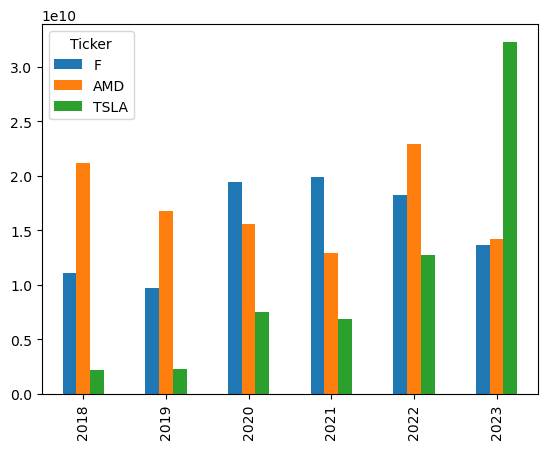

In [27]:
# calculating auto volumes per year
auto_data['Date'] = pd.to_datetime(auto_data['Date'])
auto_stocks = auto_data['Ticker'].unique()
volumes_auto = pd.DataFrame(index = auto_stocks)

for stock in auto_stocks:
    for year in years:
        # print(stock, year)
        temp_df = auto_data[auto_data['Ticker'] == stock]
        volumes_auto.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'auto volumes:')
display(volumes_auto.head())

volumes_auto.index.name = 'Ticker'
volumes_auto.loc[['F', 'AMD', 'TSLA']].transpose().plot(kind = 'bar')
max_idx = volumes_auto.idxmax()
max_values = volumes_auto.max()

# Display the result
for year, (index, value) in zip(volumes_auto.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

In [16]:
import plotly.express as px

In [24]:
volumes_auto = volumes_auto.reset_index()
volumes_auto

,level_0,index,Ticker,2018,2019,2020,2021,2022,2023
0,0,0,CPRT,5.110535e+08,3.612309e+08,4.322379e+08,2.486153e+08,3.343685e+08,6.193476e+08
1,1,1,KMX,4.631168e+08,3.993482e+08,4.183272e+08,2.881494e+08,4.976424e+08,4.707269e+08
2,2,2,PAG,1.068159e+08,9.466789e+07,9.452426e+07,7.917768e+07,1.009936e+08,7.729894e+07
3,3,3,LAD,8.136533e+07,6.011513e+07,8.547850e+07,9.253233e+07,9.486926e+07,6.405193e+07
4,4,4,AN,2.167883e+08,1.826338e+08,2.216153e+08,2.379723e+08,2.193665e+08,1.494285e+08
5,5,5,MBLY,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.147229e+08,6.143040e+08
6,6,6,APTV,4.686427e+08,3.664042e+08,5.081469e+08,3.761971e+08,5.119974e+08,4.622920e+08
7,7,7,MGA,3.321696e+08,2.513256e+08,2.671987e+08,3.480167e+08,3.141604e+08,2.688733e+08
8,8,8,LKQ,6.193124e+08,6.579871e+08,6.354435e+08,4.296933e+08,4.101113e+08,3.312271e+08
9,9,9,ALV,1.622916e+08,1.445743e+08,1.424528e+08,1.277723e+08,1.766960e+08,2.287597e+08


In [26]:
px.scatter(
    data_frame=volumes_auto,
    x = 'Ticker',
    y = '2018'
)

healthcare volumes:


,2018,2019,2020,2021,2022,2023
ISRG,201647481.0,171136660.0,182668464.0,200236188.0,527689599.0,402501607.0
BDX,294994213.0,294359126.0,461568786.0,343622099.0,309778165.0,275012600.0
ALC,0.0,246454801.0,314717951.0,203799903.0,222987909.0,205152411.0
WST,94076775.0,95187592.0,145524372.0,99113216.0,127880302.0,100784031.0
RMD,184078713.0,177291762.0,161590018.0,144982269.0,139131736.0,227231314.0


In 2018, 'PFE' has the maximum value: 5653420257.0
In 2019, 'PFE' has the maximum value: 5744360831.0
In 2020, 'PFE' has the maximum value: 8211387361.0
In 2021, 'PFE' has the maximum value: 8285808834.0
In 2022, 'PFE' has the maximum value: 6074912566.0
In 2023, 'PFE' has the maximum value: 5833544596.0


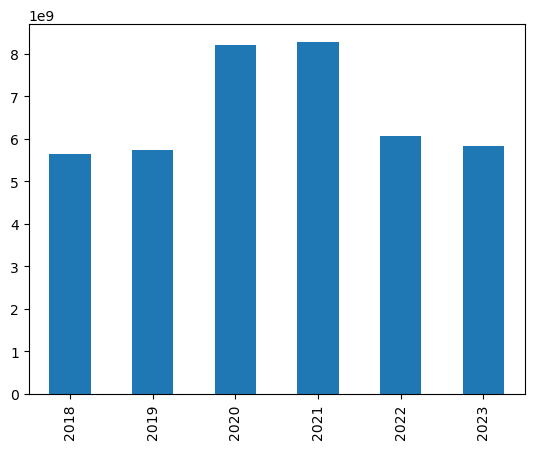

In [43]:
# calculating healthcare volumes per year
healthcare_data['Date'] = pd.to_datetime(healthcare_data['Date'])
healthcare_stocks = healthcare_data['Ticker'].unique()
volumes_healthcare = pd.DataFrame(index = healthcare_stocks)

for stock in healthcare_stocks:
    for year in years:
        # print(stock, year)
        temp_df = healthcare_data[healthcare_data['Ticker'] == stock]
        volumes_healthcare.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'healthcare volumes:')
display(volumes_healthcare.head())

volumes_healthcare.index.name = 'Ticker'
volumes_healthcare.loc['PFE'].transpose().plot(kind = 'bar')
max_idx = volumes_healthcare.idxmax()
max_values = volumes_healthcare.max()

# Display the result
for year, (index, value) in zip(volumes_healthcare.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")